In [1]:
#Setup work for the Main API Calls
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pytemperature

# Import API key
from apikeys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [2]:
# Print the city count to confirm sufficient count
len(cities)

TOT = 0
lats = []
temps = []
humids = []
clouds = []
winds = []
citys = []
countrys = []

for i in range(len(cities)):
#for i in range(len(cities)):
    if i > 0 and i % 59 == 0:
        print("Pausing for one minute to not exceed the API Call Limit")
        time.sleep(60)
    path = f"http://api.openweathermap.org/data/2.5/weather?q={cities[i]}&APPID={api_key}"
    response = requests.get(path)
    code1 = response.status_code
    if code1 == 404:
        print("City not found. Commencing next search")
    if code1 == 200:
        TOT += 1
        response_json = response.json()

        citys.append(cities[i])
        countrys.append(response_json["sys"]["country"])
        lats.append(response_json["coord"]["lat"])
        temps.append(pytemperature.k2f(response_json["main"]["temp"]))
        humids.append(response_json["main"]["humidity"])
        clouds.append(response_json["clouds"]["all"])
        winds.append(response_json["wind"]["speed"])
        print(f"Collecting data for City {TOT}: {cities[i]}")
        if TOT == 500:
            print("We have collected the quantity of cities edicted by staff")
            break

City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
Pausing for one minute to not exceed the API Call Limit
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
Pausing for one minute to not exceed the API Call Limit
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
Pausing for one minute to not exceed the API Call Limit
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
City not foun

City not found. Commencing next search
City not found. Commencing next search
Pausing for one minute to not exceed the API Call Limit
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
Pausing for one minute to not exceed the API Call Limit
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
Pausing for one minute to not exceed the API Call Limit
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
City not foun

Pausing for one minute to not exceed the API Call Limit
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
Pausing for one minute to not exceed the API Call Limit
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
Pausing for one minute to not exceed the API Call Limit
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
City not found. Commencing next search
We have collected the quantity of cities edicted by staff


In [3]:
merged = [citys,countrys,lats,temps,humids,clouds,winds]      
Weather = pd.DataFrame(merged).T
Weather.columns = ['city','country','latitude','temp','humidity','cloud','wind']

Weather.to_csv(output_data_file,index=False)

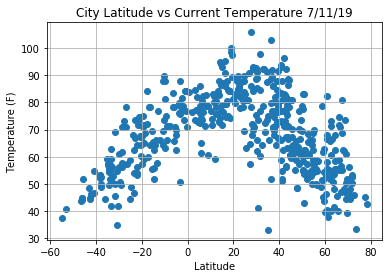

The correlation between Latitude and Temperature was -0.003


In [4]:
#temperature by latitude
plt.scatter(Weather['latitude'], Weather['temp'])
plt.title('City Latitude vs Current Temperature 7/11/19')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()
plt.savefig('LatvsTemp.png', bbox_inches='tight')
plt.show()
print(f"The correlation between Latitude and Temperature was {round(np.corrcoef(Weather['latitude'].astype(float),Weather['temp'].astype(float))[0,1],3)}")

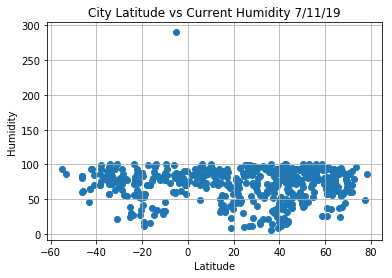

The correlation between Latitude and Humidity was -0.034


In [5]:
#humidity by latitude
plt.scatter(Weather['latitude'], Weather['humidity'])
plt.title('City Latitude vs Current Humidity 7/11/19')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.savefig('LatvsHumid.png', bbox_inches='tight')
plt.show()
print(f"The correlation between Latitude and Humidity was {round(np.corrcoef(Weather['latitude'].astype(float),Weather['humidity'].astype(float))[0,1],3)}")

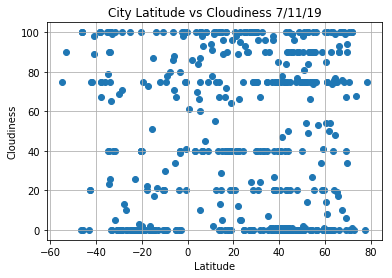

The correlation between Latitude and Cloudiness was 0.03


In [6]:
#cloudiness by latitude
plt.scatter(Weather['latitude'], Weather['cloud'])
plt.title('City Latitude vs Cloudiness 7/11/19')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.savefig('LatvsCloud.png', bbox_inches='tight')
plt.show()
print(f"The correlation between Latitude and Cloudiness was {round(np.corrcoef(Weather['latitude'].astype(float),Weather['cloud'].astype(float))[0,1],3)}")

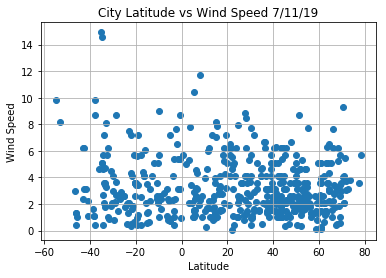

The correlation between Latitude and Wind Speed was -0.102


In [7]:
#windspeed by latitude
plt.scatter(Weather['latitude'], Weather['wind'])
plt.title('City Latitude vs Wind Speed 7/11/19')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.savefig('LatvsWind.png', bbox_inches='tight')
plt.show()
print(f"The correlation between Latitude and Wind Speed was {round(np.corrcoef(Weather['latitude'].astype(float),Weather['wind'].astype(float))[0,1],3)}")